Numpy and Matplotlib
====================



Now that we have a basic grasp of Python, we can move to some of the most useful
packages that we will use for our data and machine learning course. These are
[NumPy](https://numpy.org), a &ldquo;number crunching&rdquo; package, and [Matplotlib](https://matplotlib.org), a package that allows
us to create plots and to visualize images. With these two packages Python can
already achieve a functionality that is similar to certain scientific
computation systems such as [Matlab](https://en.wikipedia.org/wiki/MATLAB). Indeed if any of you is already familiar with
Matlab, these examples should result quite intuitive.

### Installation
On google collab most of the content in this notebook will not need installation. If using your local Python installation install with conda by writing the following in the terminal:
```
conda install -c conda-forge numpy
conda install -c conda-forge matplotlib
conda install -c conda-forge scikit-image
```


## Numpy (number crunching)



Numpy is a numerical computation package that revolves around one important
object: an `array`. It is convenion to import numpy as follows:

1.Python列表和NumPy数组之间的区别
Python 列表：

可以包含不同类型的元素。
不支持向量化操作（例如，如果没有循环或理解，则无法按元素添加两个列表）。
附带多种用于通用编程的内置方法。
NumPy 数组：

必须包含相同类型的元素，使它们对于数值计算更有效。
支持向量化运算，允许高效的逐元素运算，无需显式循环。
专为数值和矩阵运算而设计，包括线性代数、统计运算等。
何时使用：

使用 Python 列表执行通用任务，尤其是在处理不同类型的项目集合或不需要 NumPy 提供的数学功能时。
执行数值计算时，请使用 NumPy 数组，特别是当您正在处理大型数据集或需要高效执行复杂的数学运算时。

In [3]:
import numpy as np
#np give access to numpy


In English: &ldquo;import the `numpy` package and (for brevity) refer to it with the
identifier `np`&rdquo;.

We will refer to numpy specific objects with the `np` namespace hereafter, so
for example we will use `np.array` (internally the type of this object is
actually `np.ndarray`, but this syntax is hardly used unless we want to test the
type of an object).

Technically the `np.array` behaves similarly to a Python `list`, but
it is definitely a `list` on steroids and specifically taylored to operate on numbers.

Let&rsquo;s start by creating an array from a list:



为什么[]要加入()

表达式 中np.array([0, 1, 2, 3])，np.array是函数调用，其中[]表示 Python list。该列表[0, 1, 2, 3]作为参数传递给np.array函数以创建 NumPy 数组。使用括号()是因为您正在调用函数，方括号[]用于定义要转换为数组的list

使用np.array的时候需要明确指定list中的数字/元素

In [4]:
x = np.array([0, 1, 2, 3])
print(x)


[0 1 2 3]


We can use this array object similarly to lists, so for example



In [5]:
print(len(x)) # Query its length
print(x[1:-1]) # Slice it



4
[1 2]


etc&#x2026;

Things get more interesting if we create multidimensional arrays, let&rsquo;s start by
automatically creating a **2d** array (say 5 rows, 10 columns) filled with zeros.
This can be done with



In [9]:
x = np.zeros((5, 10))
x = np.array([[1, 2, 3],
             [0, 0, 0]])

print(x.shape)
print(x)





(2, 3)
[[1 2 3]
 [0 0 0]]


0和1有通用特殊性，因此除了它们其他都需要使用full

In [12]:
y = np.ones((3,7))
# d= np.elevens((3,3)) cannot\
d = np.full((3,3),11)

print(y)
print(d)


[[1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]]
[[11 11 11]
 [11 11 11]
 [11 11 11]]


NumPy 的目标是创建一个每个维度大小一致的数组。当它遇到这样的结构时，其中第一个元素表示与列表相比不同的维度（或者在普通字符串的情况下没有维度），它会引发 aValueError因为它无法将不均匀的形状调和为单个定义良好的形状数组结构。

In [14]:
a = np.array (['dsad', [1, 2, 3],[0, 0, 3]])
print(a)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

as you can see, the input to the function is a tuple (or a list) with the number
of elements in the array. The format for a 2d array is `(rows, columns)` so here
we have an array (filled with zeros) of 5 rows and 10 columns. Imagine this as a
list of lists, but with additional functionalities that we will see soon.

Note that we are not limited to 2d arrays, for example a R,G,B image could be
represented as a `(rows, columns, 3)` array where the last 3 dimensions each
represents a channel of the image&#x2026; more on this later when we look at
plotting.


In [13]:
my_3d_array = np.array([
                        [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]],  # First layer
                        [[13, 14, 15, 16], [17, 18, 19, 20], [21, 22, 23, 24]]  # Second layer
                       ])

print(my_3d_array)

[[[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9 10 11 12]]

 [[13 14 15 16]
  [17 18 19 20]
  [21 22 23 24]]]


Now if we use the `len` function on the previously created array, we will just
know the number of **rows**

In [18]:
print(len(x))
print(x)

3
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


Again, this is like taking the `len` of a &ldquo;list of lists&rdquo;, which would simply
give us the number of lists (i.e. the number of rows in the array).

To actualy know both the number of columns we can use the `shape` property of
`np.array`:



当您使用 时np.ones(4)，不需要额外的括号，因为您指定的是一维数组。在这种情况下，参数4足以定义数组的形状，表明您需要一个包含 4 个元素的数组。该函数np.ones接受一维数组的单个整数或多维数组的元组。

一维数组
np.ones(4)：创建一个包含 4 个元素的一维数组，全部设置为 1。这里，数字4是一个简单的整数参数，表示数组的长度。不需要额外的括号，因为您没有传递元组；您只是传递一个整数值。
多维数组
np.ones((3, 4))：创建一个 3 行 4 列的 2D 数组，全部设置为 1。在本例中，(3, 4)是描述数组形状的元组。元组需要用括号括起来，以将其与多个函数参数区分开来，并明确形状参数是表示数组维度的单个实体。
概括
语法上的差异（np.ones(4)vs. np.ones((3, 4))）是由于需要区分单维数组（其中单个整数足以描述其形状）和多维数组（其中需要一个元组来指定维度）。在 Python 中，元组括在括号中，这就是为什么函数中的多维形状np.ones需要一组额外的括号。

In [15]:
x = np.ones((3,4))
# np.ones(3,4)- wrong
''''''
print(x)
rows, cols = x.shape

c = np.ones(4)
print(c)


[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[1. 1. 1. 1.]


and to know only one or the other we could do



In [16]:
rows = x.shape[0]
cols = x.shape[1]
print(rows) 
print(cols)


3
4


This can be interpreted as the rows being the &ldquo;height&rdquo; of the array and the
columns the &ldquo;width&rdquo;. But note that the order is rows first and columns after.
This has to do with how the elements of the array would ideally be stored in the
computer&rsquo;s memory.

Alternatively we can create a 1d array by passing a single number instead of a
tuple. Let&rsquo;s say we want an array with 10 times `1.0`, we can use the `np.ones`
function instead:



In [17]:
y = np.ones(10)
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

and this has exactly the same syntax as `np.zeros`.

Another very frequently used function is `np.linspace(start, end, num)`. This
gives us an array with `num` equally spaced elements between the number `start`
and the number `end`, e.g.:



In [23]:
np.linspace(-1, 1, 9)

array([-1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ])

start: The starting value of the sequence.

stop: The end value of the sequence, and, unless endpoint is set to False, stop is the last value in the sequence.

num: Optional. The number of samples to generate. Default is 50.

In [24]:
#np.linespace([1,3,4],[2,3,4],2)
#np. linespace(np.array([1,3,4]), np.array([2,3,4]),2)


In [30]:
for x in np.linspace(-1, 1, 9):
    print(x)
'''进一步处理的灵活性：循环方法允许您在打印之前对每个元素执行操作或对每个元素使用更复杂的逻辑。
例如，您可以以不同的方式格式化数字、过滤它们或执行计算。'''

-1.0
-0.75
-0.5
-0.25
0.0
0.25
0.5
0.75
1.0


and since `np.array` is iterable we can concisely write a for loop doing things
(here quite pointless) with these numbers:



In [32]:
txt = ''
for t in np.linspace(-1, 1, 9):
    txt += str(t+10) + ' '
print(txt)
#第 1 步：生成数组np.linspace
#np.linspace(-1, 1, 9)生成 9 个介于 -1 和 1 之间（含 -1 和 1）的均匀分布的数字
#第 2 步：循环数组
#该循环for t in np.linspace(-1, 1, 9):迭代t生成的数组中的每个数字np.linspace。
#第 3 步：转换和连接
#在循环内，txt += str(t+10) + ' '对每个数字执行以下操作t：
#添加10到t，有效地将范围从 转移[-1, 1]到[9, 11]。
#将结果转换t+10为字符串str(t+10)。
#将此字符串和一个空格连接' '到该txt字符串。添加空格' '是为了分隔最终输出中的数字。

9.0 9.25 9.5 9.75 10.0 10.25 10.5 10.75 11.0 


Arrays are a very convenient representation to store the vectors we have seen in
Week 3, and allow us to easily do operations on those.



#### Random number generation



Numpy also has a powerful random number generation submodule `numpy.random`.
Because we called Numpy `np` we can directly access the functionalities of this module with `np.random`.
We can for example generate arrays with uniform random numbers within a range with the `np.random.uniform(min, max)` function:



In [29]:
np.random.uniform(-100, 100)
#每一次的结果都不一样

-19.649446551040484

Or we can generate arrays by specifying the shape similarly to the `np.zeros` function, e.g.



In [28]:
np.random.uniform(-10, 10, (5, 2))

array([[-1.95491908,  4.56429776],
       [-0.77791603, -1.4761222 ],
       [ 9.74370006,  5.70723391],
       [ 4.47020476,  6.98497065],
       [-2.28516181,  3.5079452 ]])

for a 2d array, or



In [33]:
np.random.uniform(-1, 1, 10)

array([-1.09907014e-02,  4.38695032e-01, -1.53457863e-01,  3.44164452e-01,
        8.78260491e-01, -9.33080097e-01,  6.99835218e-01,  7.91295798e-01,
        9.05227411e-04,  7.87865677e-01])

for a 1d array.

If we want to always get the same random values, we can set a number as a **seed**
to the random number generator. For example, running this code multiple times
will always return the same tow random sequences:



In [35]:
#seed
np.random.seed(100)
print(np.random.uniform(-1, 1, 3))
print(np.random.uniform(-1, 1, 5))

[ 0.08680988 -0.44326123 -0.15096482]
[ 0.68955226 -0.99056229 -0.75686176  0.34149817  0.65170551]


In [37]:
np.random.uniform(-50,50,(2,3,5))

array([[[-36.32934103,   7.50933294,  39.13219543, -29.07978779,
         -31.46717804],
        [-39.16231095, -28.03025074,  47.86237847,  31.16831491,
         -32.80589873],
        [ 31.62247487, -22.5926253 ,  -6.82958163,  44.00298196,
          31.76493788]],

       [[-16.38880499, -32.45895463, -12.71679537, -49.43114926,
         -24.75736466],
        [ 29.56625085, -48.47450288,   9.88433769,  10.3804539 ,
         -39.48523146],
        [-11.80565551, -46.35239434,  39.04115634,  48.0920857 ,
         -44.00580112]]])

### Indexing and slicing arrays



Numpy arrays are iterable objects and behave similarly to lists. And using the
exact syntax we used to index and slice lists will result in the same behaviour.
For instance the following will give us the first 3 rows of the array



In [45]:
x = np.linspace(0, 9, 10)
print(x)
print(x[:3])
print(x[1:])


[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[0. 1. 2.]
[1. 2. 3. 4. 5. 6. 7. 8. 9.]


while this will give us the third row



In [48]:
x = np.ones((6,7))
print(x)
print(x[2])
x[0][2]

#x[0][2]：这使用两步索引。
#首先，x[0]访问数组的第一行（返回表示该行的一维数组），
#然后[2]访问该行的第三个元素。这本质上是链接索引操作。
#单步多维索引 ( x[0,2]) 通常更高效，
#并且是对 NumPy 数组中的元素进行索引的惯用方法，因为它更直接、更清晰，
#尤其是对于二维以上的数组。

#x[0,2]：这使用单步多维索引，直接访问第 0 行第 2 列的元素。
#这是在 NumPy 中索引多维数组的更简洁和首选的方法。
#x[0][2]对于来自某些其他语言或以嵌套方式访问多维数据结构的上下文的程序员来说，
#两步索引 ( ) 可能更熟悉。但是，它的效率较低，并且对于高维数组可能会更加麻烦

[[1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]]
[1. 1. 1. 1. 1. 1. 1.]


1.0

Things start to differ from lists if we want to access a single element:



In [49]:
x[0,2]

1.0

this could be done with the the same syntax that would work with the &ldquo;list of lists&rdquo;:



In [50]:
x[0][2]


1.0

but the former is more concise and more frequently used. We then can also use
the slicing syntax in a similar way, say to get the last three columns of the
array we can do



In [52]:
print(x)
x[:,-3:]
#x：这是您正在使用的 NumPy 数组，
#其形状为(6, 7)- 意味着它有 6 行和 7 列，全部填充有值1.0。
#:：第一个位置的冒号:（逗号之前）表示您要包含数组的所有行。
#在切片语法中，独立的冒号表示“选择此维度中的所有内容”，因此不会排除任何行。
#-3:：这部分适用于数组的列。表示-3切片的起始索引是数组的倒数第三列。
#没有指定结束索引的冒号:意味着切片应该一直到达该维度中数组的末尾。
#，-3没有指出具体的row，只说了倒数第三行colum

[[1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]]


array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

where the `:` alone can be read as &ldquo;give me all the rows&rdquo;.
Now, what would you do to get only the first three rows?
Insert the code here:



array[start_row:end_row, start_column:end_column]


In [56]:
x[0:3,-3:]
print(x[0:3,-3:]*2+100)

[[102. 102. 102.]
 [102. 102. 102.]
 [102. 102. 102.]]


To practice slicing it is useful to actually look at an image, which we will represent as a numpy array.
There are many ways to load an image in Python. We will use the [Pillow](https://pypi.org/project/Pillow/) library which can be accessed with the `PIL` module. If the code below does not work install Pillow with

In [57]:
!pip install Pillow



Now let's load the image and visualize it. We will use Matplotlib for this using `import matplotlib.pyplot as plt`. Do not worry about the details for now, just keep in mind that you can visualize a numpy array as an image using `plt.imshow(your_image)`.

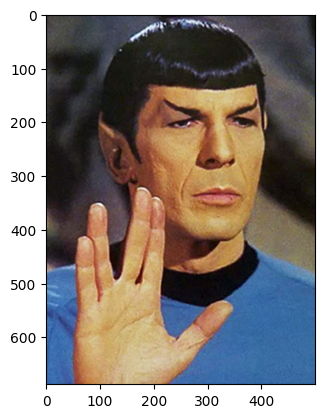

In [6]:
from PIL import Image
import matplotlib.pyplot as plt
img = np.array(Image.open('images/spock.jpg'))
plt.imshow(img)


Now let's examine the shape of the image

In [59]:
img.shape

(688, 500, 3)

That is we have 688 rows (height), 500 columns (width) and 3 channels. Let's slice this and see what happens. Experiment with the code

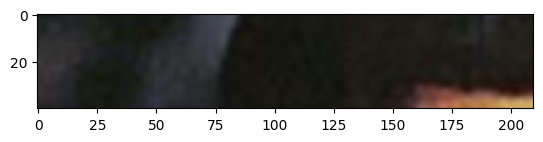

In [61]:
plt.imshow(img[100:140, 30:240, :])
#100-140 row 30-240 column and all rgb included here


颜色通道的索引为 0（红色）、1（绿色）和 2（蓝色）。
Red Channel Only: img[100:140, 30:240, 0]
Green Channel Only: img[100:140, 30:240, 1]
Blue Channel Only: img[100:140, 30:240, 2]


Now let's look at a single channel

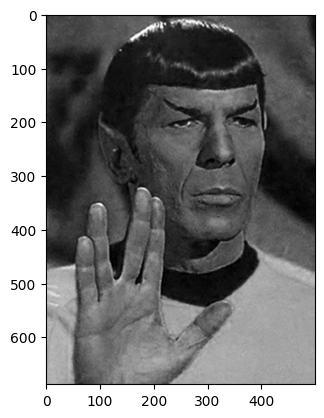

In [65]:
#plt.imshow(img[:, :, 0], 'gray')
plt.imshow(img[:, :, 2], 'gray') #blue one is more obvious

Now let's flip the image on the horizontal axis

:（第一个位置）：选择沿第一个维度（图像的高度）的所有元素（整个范围）。这意味着图像的行没有发生任何变化。

::-1（第二个位置）：这会沿第二个维度（图像的宽度）反转元素。通过用作-1切片中的步长值，可以反转元素的顺序，从而有效地水平翻转图像（左右翻转）。

:（第三个位置）：这将选择第三维（颜色通道）上的所有元素，确保每个像素的所有颜色信息都保留且不改变

模板注释
水平翻转：img[:, ::-1, :]从左到右翻转图像。
垂直翻转：img[::-1, :, :]从上到下翻转图像。
颜色通道显示：此示例显示如何隔离和显示红色通道。您可以通过将绿色和蓝色的索引更改为来修改绿色或蓝色0通道。red_channel[:, :, 0]12

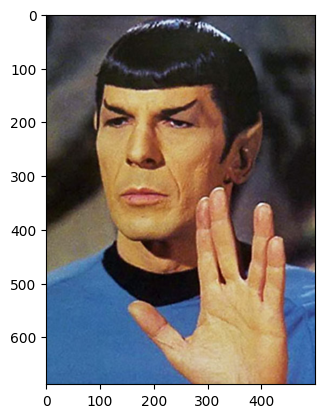

In [63]:
plt.imshow(img[:, ::-1, :])

3d array数组
array[start_row:end_row:step_row, start_col:end_col:step_col, channel_slice]
以下是每个部分代表的含义：

start_row:end_row:step_row：此切片选择从start_row到 之前的行end_row，获取每step_row行。如果省略start_rowor end_row，则分别默认为数组的开头或结尾。如果step_row省略（或者如果整个部分只是:），它将选择每一行。

start_col:end_col:step_col：类似地，此切片选择从start_col到 之前的列end_col，并选取第step_col- 列。省略值的规则与行的规则相同。

channel_slice：由于图像数组的第三个维度通常表示颜色通道，因此该部分选择要包含的通道。它可以是单个索引（例如，0对于第一个通道）、切片（例如:，它将包括所有通道）或特定的通道序列。



Or the channels

理解img[::-1, ::-1, ::-1]
此表达式适用于 3D NumPy 数组img，它通常用于表示彩色图像。数组维度通常是高度（行）、宽度（列）和通道（颜色深度）。切片[::-1, ::-1, ::-1]应用于所有三个维度：

[::-1]对于第一个维度（高度/行）：这会反转图像中行的顺序。如果图像被视为从上到下的一堆行，则此操作会垂直翻转图像（顶部变为底部，反之亦然）。

[::-1]对于第二个维度（宽度/列）：类似地，这会颠倒图像中列的顺序，水平翻转图像（左侧变为右侧，反之亦然）。

[::-1]对于第三维（通道/颜色深度）：这会颠倒通道的顺序。对于 RGB 图像，此操作会将通道从 RGB 切换到 BGR（假设原始顺序是 RGB）。

效果总结:

图像垂直和水平翻转，导致 180 度旋转。
颜色通道反转。如果原始图像是 RGB 格式，则此操作后它将显示为 BGR，如果使用期望 RGB 顺序的工具显示，则会影响颜色。
为什么会出现混乱
看到多个:带有负步长 ( -1) 的运算符一开始确实会让人感到困惑。以下是如何解释这些切片：

:alone表示“选择该维度中的所有元素”。
::-1意思是“选择该维度中的所有元素，但以相反的顺序。”


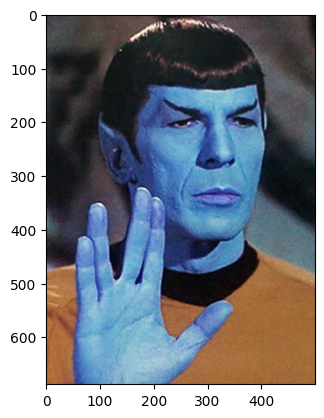

In [64]:
plt.imshow(img[:, :, ::-1])

### Adding elements, combining and &ldquo;transposing&rdquo; arrays



One downside of `np.array` with respect to a `list` is that we cannot really use
`append` to add elements dynamically. Well that is not a problem for a &ldquo;true
Pythonista&rdquo;, would probably disdain doing so. We can however use the
`np.concatenate` function to concatenate multiple arrays, or even simple Python
lists. For example, if we wanted to add a `1.0` to a 1d array of 3 zeros we
could do



用于动态操作的 Python 列表与 NumPy 数组
Python 列表：它们本质上是动态的。append()您可以使用或等方法轻松地将元素添加到列表中extend()，从而使列表对于集合大小可能频繁更改的操作非常灵活。

NumPy 数组：这些数组是为了提高数值数据的效率和运算而设计的。数组在创建时具有固定大小，这意味着您不能像使用列表那样直接将元素追加到数组中。这种固定大小允许 NumPy 更有效地分配内存并快速执行向量化操作。

向 NumPy 数组添加元素
由于您无法直接附加到 NumPy 数组，因此您需要使用诸如np.concatenate将现有数组合并为更大数组之类的函数。此操作有效地创建一个新数组，其中包含原始数组中的元素。

!!!为工作选择正确的工具非常重要：使用list来存储需要动态增长的集合，使用 NumPy array来对固定大小的数据进行高效的数值计算。

------------------
append 与 concatenate

append追加：

在 Python 列表的上下文中，append()将单个元素添加到列表的末尾。它会就地修改列表，并且不会返回新列表。

例子：my_list.append(1)

concatenate连接：

在 NumPy 中，np.concatenate()将两个或多个数组组合成一个数组。它不会修改原始数组，而是返回一个新数组，该新数组是输入数组的组合。

例子：np.concatenate([array1, array2])

---------
设计理念：Python 列表被设计为通用容器，因此append()非常适合许多列表操作，允许动态调整大小。
然而，NumPy 优先考虑数值计算和效率。为了提高内存效率和快速计算，数组具有固定大小，这就是为什么append 对于 NumPy 数组来说不是一个简单的操作。相反，concatenate是作为组合数组的一种方式提供的，这与 NumPy 的用例和性能目标保持一致。

性能注意事项：就性能而言，append到列表的成本相对较低。然而，对于 NumPy 数组，concatenate需要创建一个新数组并复制数据（因为数组具有固定大小），这效率较低，尤其是在循环中。np.concatenate()一次组合多个数组更有效。

-------
可以把np.concatenate用于 NumPy array以外的类型吗？
是的，np.concatenate()可以接受list和tuple作为输入，在concatenate过程中将它们转换为array。但是，输出始终是 NumPy 数组。

---------
何时使用：

append()当您需要一次添加一个元素并且更喜欢就地修改列表时，请与列表一起使用。

np.concatenate()在使用 NumPy 数组并且需要将多个数组合并为一个数组时使用。当您提前知道要组合的所有数组时，它特别有用。

对于 NumPy 中动态增长的数组，请考虑在数据收集阶段使用列表 (with append())，然后将列表转换为 NumPy 数组np.array()以进行进一步处理。这种方法利用了列表的灵活性和 NumPy 数组的计算效率。

In [7]:
y = np.zeros(3)
print(y)
y = np.concatenate([y, [1.0]])
print(y)


[0. 0. 0.]
[0. 0. 0. 1.]


We can concatenate any number of arrays, e.g. let&rsquo;s make an array that looks
like `[0.0, 0.0, 1.0, 1.0, 0.0, 0.0]`:



In [8]:
np.concatenate([np.zeros(2), np.ones(2), np.zeros(2)])

array([0., 0., 1., 1., 0., 0.])

In [17]:
y = np.zeros(3)
print(y)
y = np.concatenate([y, [1.0]])
print(y)
#a = np.concatenate((1,2,3)[3,4,5])
#print(a)
#cannot do this adding directly

a = np.concatenate((np.array((1, 2, 3)), np.array([3, 4, 5])))
print(a)
#np.array((1, 2, 3)) converts the tuple (1, 2, 3) into a NumPy array.
#np.array([3, 4, 5]) converts the list [3, 4, 5] into a NumPy array.
#np.concatenate((..., ...)) concatenates the two arrays. The arrays to be concatenated are passed as a tuple to np.concatenate.

c = np.concatenate((y, [11.0], [33]))
print(type(c))
#函数调用括号()：当您在 Python 中调用任何函数（包括 ）时np.concatenate，您可以使用括号将传递给函数的参数括起来。
#[]列表的方括号： 的参数np.concatenate是数组序列。在本例中，您使用的是用方括号表示的列表。该列表包含您要连接的项目。这就是为什么你会看到[y, [11.0], [33]]：
#[11.0]是一个包含单个浮点数的列表。 [33]是另一个包含单个整数的列表。


[0. 0. 0.]
[0. 0. 0. 1.]
[1 2 3 3 4 5]
<class 'numpy.ndarray'>


np.concatenate用法：()对比[]
对tuple使用括号：np.concatenate((array1, array2))
使用方括号表示list：np.concatenate([array1, array2])

这两行都做同样的事情：它们连接array1和array2。语法的差异（()元组和[]列表）不会影响结果，np.concatenate因为它只是迭代提供的序列，无论该序列是元组还是列表。

何时使用:
元组和列表之间的选择取决于您，因为函数的行为与两者相同。如果您希望保持代码一致或遵循特定的样式指南，则可以选择其中之一。在实践中，列表（[]）因其灵活性和可读性而更常用，特别是当数组序列可能动态生成或修改时。

In [22]:
np.concatenate([np.zeros(2), np.ones(2), np.zeros(2)])#list
np.concatenate((np.zeros(2), np.ones(2), np.zeros(2)))#tuple

array([0., 0., 1., 1., 0., 0.])

Now let&rsquo;s say we want to concatenate 2d arrays or combine 1d arrays to create a
2d array. Here we can use the

`np.hstack` - horizontal

`np.vstack` - vertical

functions, which
respectively concatenate arrays in the &ldquo;horizontal&rdquo; and &ldquo;vertical&rdquo; directions.
Observe this code:



In [23]:
print(np.ones((2,3)))
print(np.vstack([np.ones(3), np.ones((2, 3))]))
print(np.array([[3,4,2], [100,6,5]]))
print(np.vstack([np.ones(3), np.array([[3,4,2], [100,6,5]])]))

[[1. 1. 1.]
 [1. 1. 1.]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[  3   4   2]
 [100   6   5]]
[[  1.   1.   1.]
 [  3.   4.   2.]
 [100.   6.   5.]]


np.ones(3)创建形状为 的一维数组(3,)。
np.array([[3,4,2], [100,6,5]])创建形状为 的二维数组(2, 3)。
np.hstack用于水平堆叠，这意味着它将数组并排对齐。为此，数组必须具有相同的行数。但是，一维数组没有显式具有“行”维度，因此 NumPy 将其视为具有 1 行，这与 2D 数组的 2 行不匹配。这会导致无法解决的尺寸不匹配np.hstack。

In [28]:
#print(np.hstack([np.ones(3), np.array([[3,4,2], [100,6,5]])]))
print(np.array([[3,4,2], [100,6,5]]))
print(np.zeros((2,3)))
print(np.hstack([np.zeros((2,3)), np.array([[3,4,2], [100,6,5]])]))

[[  3   4   2]
 [100   6   5]]
[[0. 0. 0.]
 [0. 0. 0.]]
[[  0.   0.   0.   3.   4.   2.]
 [  0.   0.   0. 100.   6.   5.]]


Note here that for NumPy, a 1d array is a &ldquo;row&rdquo; of elements (that can get a bit
ambiguous in certain cases, but we will not cover it here).

Similarly, we can stack arrays in the horizontal direction

可以运用到图片排列中

In [20]:
A = np.hstack([np.ones((2, 1)), np.zeros((2, 2))])
A

array([[1., 0., 0.],
       [1., 0., 0.]])

These functions will only work if the size of the arrays we want to combine is
&ldquo;compatible&rdquo;, i.e. we can only stack horizontally if arrays have the same number
of rows, and we can only stack vertically if arrays have the number of columns.

Now what if I wanted to append a column to `A` with the values `[2, 3]`? Doing
this will not work because, as we previously mentioned, a &ldquo;1d array&rdquo; (a list is
equivalent to one), is considered as a row:



In [ ]:
#np.hstack([A, [2, 3]])

One can use this kind of syntax



In [21]:
np.hstack([A, np.array([2, 3]).reshape(-1,1)])

array([[1., 0., 0., 2.],
       [1., 0., 0., 3.]])

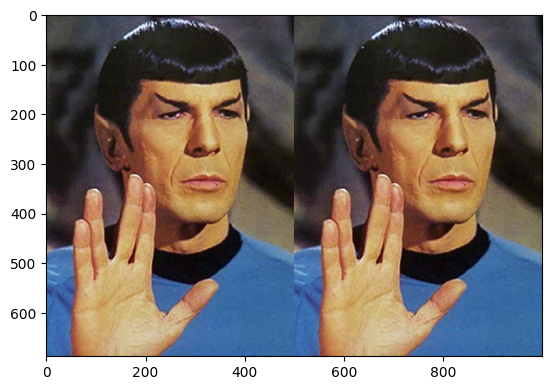

In [29]:
plt.imshow(np.hstack([img,img]))

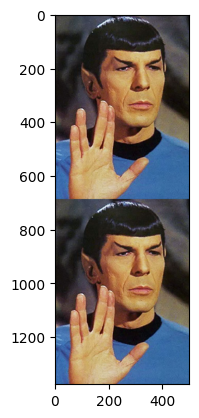

In [30]:
plt.imshow(np.vstack([img,img]))
#可以做出更多的变换形式，比如加入random

and [others](https://stackoverflow.com/questions/5954603/transposing-a-1d-numpy-array), or use an operation known as &ldquo;transpose&rdquo;, which can be handy also in
other cases.



#### Transposing



For 2d array we can do a transpose operation, a term that comes from &ldquo;matrices&rdquo;
in linear algebra, which are also represented as 2d grids of numbers. Indeed 2d
numpy arrays are convenient representation of these mathematical objects, which
are fundamental to most machine learning techniques we will be using. We won&rsquo;t
conver these mathematical details but the interested reader can refer for
example to https://www.statlect.com/matrix-algebra/ for a primer.

Anyhow, transposing an array simply means &ldquo;transforming&rdquo; it so rows become
columns and columns become rows. Say we create an array as follows:



了解转置.T
转置二维数组（或矩阵）意味着将数组翻转其对角线，将行变成列，将列变成行。此操作在线性代数中很常见，并且经常用于数据处理和机器学习中，用于重新排列数据或对齐数组以进行计算。

In [31]:
B = np.vstack([np.linspace(0, 4, 5),
               np.linspace(1, 5, 5)])
B

array([[0., 1., 2., 3., 4.],
       [1., 2., 3., 4., 5.]])

The transpose is given by the &ldquo;property&rdquo; `.T` as follows:



In [32]:
B.T

array([[0., 1.],
       [1., 2.],
       [2., 3.],
       [3., 4.],
       [4., 5.]])

Now to add a coumn to the previous `A` array, we could do:



A.T：这是 的转置A，具有 shape (3, 2)。

[2, 3]：这是一个旨在作为额外行添加到 的列表A.T。但是，要使用np.vstack，需要数组具有兼容的形状，[2, 3]应将其包装在另一个列表中或转换为二维数组以匹配 的维数A.T。

np.vstack([A.T, [2, 3]])A.T：与垂直堆叠[2, 3]。为了使其正常工作而不会出现错误，其[2, 3]形式应与 的列大小相匹配A.T。正确来说，应该是np.vstack([A.T, [[2, 3]]])。

.T：转置堆叠的结果，将其变回添加的元素[2, 3]成为最后一列的形式。

In [36]:
print (A)
print (A.T)
np.vstack([A.T, [2, 3]]).T

[[1. 0. 0.]
 [1. 0. 0.]]
[[1. 1.]
 [0. 0.]
 [0. 0.]]


array([[1., 0., 0., 2.],
       [1., 0., 0., 3.]])

### Reshaping arrays
In machine learning applications we will often encounter cases where we need to reshape a numpy array so it is compatible with the inputs of a given machine learning model.
For example, we will see image-based models that are trained on batches of multiple RGB images with shape `(height, width, 3)`, which are stored as a single array with shape `(number_of_images, height, width, 3)`. If we want to use such a model with a single image, we need to reshape an array by adding a dummy dimension. This can be done with the `np.expand_dims` function or the `reshape` method of the array itself. As long as we add *one* dimension, the order of the data in the array will remain unchanged.
So for example given an array:

重塑数组
在机器学习应用程序中，我们经常会遇到需要重塑numpy数组以使其与给定机器学习模型的输入兼容的情况。
例如，我们将看到基于图像的模型在形状为' (height, width, 3) '的多个RGB图像上进行批量训练，这些图像存储为形状为' (number_of_images, height, width, 3) '的单个数组。如果我们想对单个图像使用这样的模型，我们需要通过添加虚拟维度来重塑数组。这可以用' np '来完成。Expand_dims '函数或数组本身的'重塑'方法。只要我们增加一个维度，数组中数据的顺序将保持不变。
例如，给定一个数组:

In [37]:
img = np.zeros((600, 800, 3))
print(img.shape)


(600, 800, 3)


We can equivalently do:

In [38]:
img2 = img.reshape((1, 600, 800, 3))
print(img2.shape)


(1, 600, 800, 3)


Or

In [39]:
img2 = np.expand_dims(img, 0)
print(img2.shape)


(1, 600, 800, 3)


In another instance we will see grayscale images that are loaded as arrays of shape `(height, width)`. In this case we will need to add two dummy dimension, one at the beginning and one at the end resulting in a shape of `(number_of_images, height, width, 1)`. This stands for "one image of width, height with one channel". Again since we add single dimensions we are effectively not modifying the number of elements in the array. So in this instance, given an image

In [40]:
img = np.zeros((600, 800))
img.shape


(600, 800)

We would do:

In [41]:
img2 = img.reshape((1, 600, 800, 1))
img2.shape


(1, 600, 800, 1)

### Mathematical operations on arrays



Ok, now to some more &ldquo;meaty&rdquo; things we can do with arrays. Differntly from
lists, we can do operations with arrays such as multiplication, addition etc..etc&#x2026;

Multiplying/dividing/adding/subtracting/raising-to-a-power with a single number,
applies the operation to all elements in an array. So now, finally, we can make
an array all of 9&rsquo;s!



In [42]:
np.ones((5,3))*9

array([[9., 9., 9.],
       [9., 9., 9.],
       [9., 9., 9.],
       [9., 9., 9.],
       [9., 9., 9.]])

As a small exercise, try creating the same array with addition.

We can also apply other operations in &ldquo;batch&rdquo; form for example let&rsquo;s take the square root of
a sequence of numbers:



In [43]:
np.sqrt(np.linspace(0, 7, 3))

array([0.        , 1.87082869, 2.64575131])

See [https://numpy.org/doc/stable/reference/routines.math.html>](https://numpy.org/doc/stable/reference/routines.math.html>)for a list of
available operations.

As another example we can very rapidly get the values of a
cosine wave with an expression such as



In [44]:
np.cos(np.linspace(0, np.pi*2, 20))

array([ 1.        ,  0.94581724,  0.78914051,  0.54694816,  0.24548549,
       -0.08257935, -0.40169542, -0.67728157, -0.87947375, -0.9863613 ,
       -0.9863613 , -0.87947375, -0.67728157, -0.40169542, -0.08257935,
        0.24548549,  0.54694816,  0.78914051,  0.94581724,  1.        ])

&#x2026;we will plot this one soon.

As long as two arrays have the same dimension, we can also
multiply/add/subtract/divide **between them**, e.g:



In [45]:
np.linspace(0, 1, 5) + np.linspace(-2, -1, 5)

array([-2. , -1.5, -1. , -0.5,  0. ])

Or



In [46]:
np.array([[1, 2, 3],
          [4, 2, 4],
          [3, 3, 5]])*np.eye(3)

array([[1., 0., 0.],
       [0., 2., 0.],
       [0., 0., 5.]])

where `np.eye(num)` gives us a square array with `num` columns and ones along
the diagonal. Again these operations are element-wise and require the arrays to
have exactly the same shape. When dealing with with 2d arrays, this form of
multiplication is &ldquo;unusual&rdquo; as typically 2d array represent matrices and
multiplication between matrices is not element-wise and obeys specific rules and
restrictions (it is fundamental to artificial neural networks). If you want to
sound sophisticated with nerd friends, this element-wise form of multiplication
has a special name, it is called the [&ldquo;Hadamard product&rdquo;](https://en.wikipedia.org/wiki/Hadamard_product_(matrices)) (say it with a serious
face while stroking your chin), which also shows how math sometimes sounds
scarier than what it actually is.



### More operations on arrays



Numpy provides some useful functions to examine and manipulate arrays. The
`np.max` and `np.min` functions give us the maximum and minimum value of an
array (or even a list). For example



In [47]:
z = np.random.uniform(-10, 10, 10) # generate an array with 10 random values between -10 and 10
print(z)
print('Maximum is: ' + str(np.max(z)))

[-4.00012958  4.53697646 -8.70905151 -4.29481067 -2.34278946 -3.69490086
  7.53807309 -8.93570649 -4.59119643  6.06942741]
Maximum is: 7.5380730920064245


This could be used for example to normalize the array



In [48]:
(z - np.min(z)) / (np.max(z) - np.min(z))

array([0.29960198, 0.81782586, 0.01375853, 0.28171409, 0.4002067 ,
       0.31813013, 1.        , 0.        , 0.26372273, 0.9108495 ])

Another couple of particularly useful functions ar `np.argmin` and `np.argmax`. These give us **the index** of the minimum and maximum value in an array (or a list).
One example use of these functions is in a classification setting. Say our classifier gives us a series of probabilities for given classes. We can concisely find the maximum class (as an index) with



In [49]:
p = [0.3, 0.5, 0.1, 0.1]
print(p)
print("Maximum is " + str(np.argmax(p)))

[0.3, 0.5, 0.1, 0.1]
Maximum is 1


Note that here we used a simple list and not an array.

One more useful function is `np.sum`. It  sums all the values in an array and returns the result.
E.g.



In [50]:
z = np.linspace(0, 5, 4)
print(z)
print(np.sum(z))

[0.         1.66666667 3.33333333 5.        ]
10.0


For multi-dimensional arrays it is possible to also sum along rows, or columns, etc.., by specifying the `axis` optional argument:



In [51]:
z = np.ones((3, 4))
print(z)
print(np.sum(z, axis=0)) # sum along columns
print(np.sum(z, axis=1)) # sum along rows

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[3. 3. 3. 3.]
[4. 4. 4.]


In this case the result is an array and not a number. The same &ldquo;axis&rdquo; trick also holds for `np.min` and `np.max` and many other functions.



## Matplotlib (plotting)



With some NumPy tools in place, let&rsquo;s dive into creating some images. One of the
most widely used tools for this taks in Python is a package called [Matplotlib](https://matplotlib.org).
This is a large and sometimes difficult to grasp (well) visualization framework,
that is inspired to the plotting capabilities of Matlab. The typical way to
import matplotlib is the following:



In [52]:
import matplotlib.pyplot as plt

In English: &ldquo;import the `pyplot` module from the `matplotlib` package and refer to it
with the identifier `plt`&rdquo;.

As a basic example let&rsquo;s plot `100` samples from a sine wave:



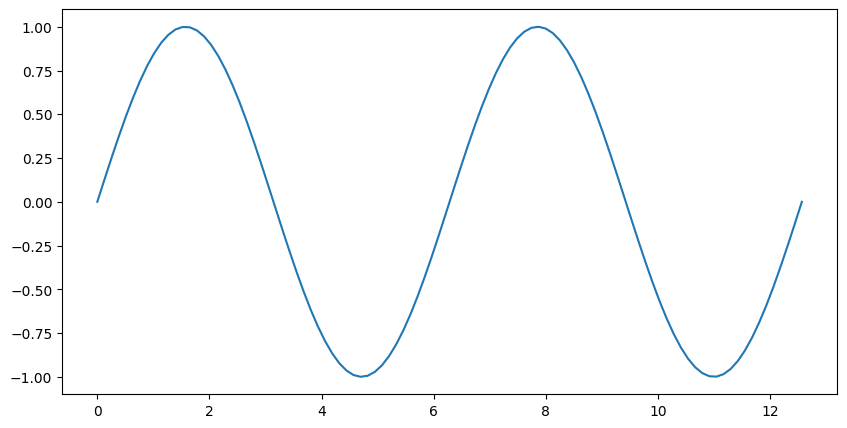

In [53]:
x = np.linspace(0, np.pi*4, 100)
y = np.sin(x)

plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.show()

Now let&rsquo;s walk through the code. The first two lines use the methods we have
seen in the earlier section to generate an array of values and to then compute
the value of the `sin` function for each of these values.

In the rest of the code, first we create a new &ldquo;figure&rdquo; with the `plt.figure`
function. Here we can see a very common Python construct we have not encountered
before: a named optional argument. **In Python we can define functions with
arguments that have a default value, and then set these arguments in an
arbitrary order by explicitly naming them**. So here for example, we decide to
specify the size of the image, which is sepecified with the argument `figsize`
and a tuple `(width, height)`. This parameter is optional, so try to remove it
and see what happens.

From now on, all our plotting commands will end up in the current &ldquo;figure&rdquo;. The
next line is the `plt.plot` function that takes a series of `x` coordinates and
a corresponding series of `y` coordinates.

Finally, the `plt.show()` function displays our result.



### Combining multiple plots into one



Now say we want to show a sine and a cosine wave in the same plot:



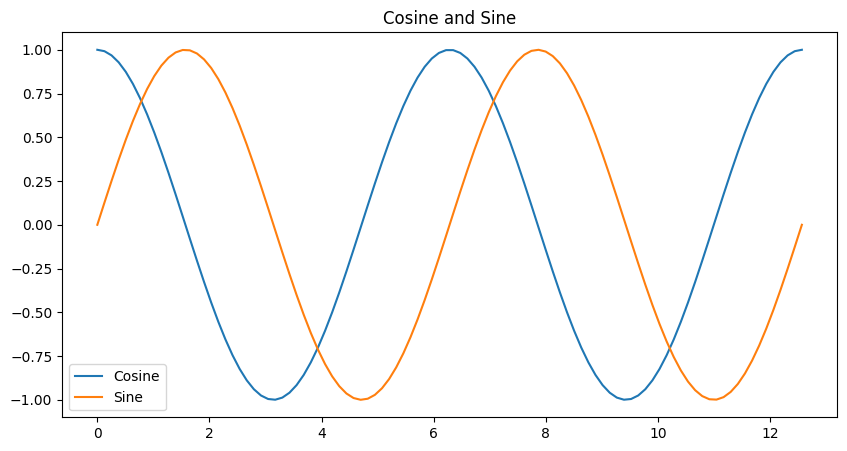

In [54]:
plt.figure(figsize=(10, 5))
plt.title("Cosine and Sine")
plt.plot(x, np.cos(x), label='Cosine')
plt.plot(x, np.sin(x), label='Sine')
plt.legend()
plt.savefig('myplot.pdf')
plt.show()

Here you can see that after specifying the &ldquo;figure&rdquo; the following `plt.plot`
commands adds curves to the same figure. Anything we do between `plt.figure` and
`plt.show` will be added to the given figure. So in this example, we have added a title with the
`plt.title` function, and we have specified labels for our curves with the
`label` optional argument. Finally we visualize the legend with `plt.legend()`.
In this example we also save the figure as a pdf. This can be easily done with
the `plt.savefig` function. Note that this function should be called as the last
thing before `plt.show()`.

In the example above, Matplotlib automatically sets colors for us. However, we
can explitly set the colors, and many other parameters. See [the function&rsquo;s
documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) for examples and more info.

The important thing to grasp here is that Matplotlib works in a &ldquo;stateful&rdquo;
manner. We crate a figure and then incrementally add things to it and change
it&rsquo;s state (e.g. adding a title, a legend) and finally viusalize it when we
finished our specification.



### Subplots



It is often useful to place multiple plots into the same figure. This can be
easily done with Matplotlib. Say we want to draw the sine and cosine waves into
two different plots. One method to do this could be:



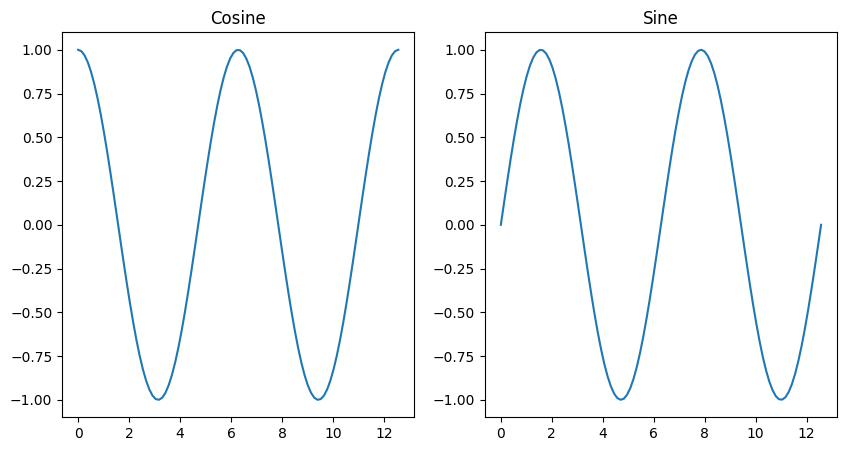

In [55]:
plt.figure(figsize=(10, 5))
ax = plt.subplot(1, 2, 1)
plt.title("Cosine")
plt.plot(x, np.cos(x))
ax = plt.subplot(1, 2, 2)
plt.title("Sine")
plt.plot(x, np.sin(x))
plt.show()

The key here is the `plt.subplot(num_rows, num_cols, index)`, which tells
Matplotlib that our current drawing commands will go into a &ldquo;subplot&rdquo; within a
`num_rows * num_cols` grid and in the cell with a given `index`. The index
starts from the top left cell and continues along each row. So say we had a 2x2
grid, the index to draw into the first cell of the second row would be `3`.

Here, you will notice that we store the result of the `plt.subplot` function.
This gives us an `Axes` object, which refers to the current sub-plot and is
useful to set its properties.



### Loading and showing images



To load an image, we will use a new package, [Scikit Image](https://scikit-image.org) or `skimage` for
short. We will use the `io` module of `skimage` and import it with



In [57]:
from skimage import io

ModuleNotFoundError: No module named 'skimage'

Note that we don&rsquo;t use `as` here since the module name is conveniently short.
We can load and show the image with:



In [ ]:
img = io.imread('./images/spock.jpg')
plt.figure()
plt.imshow(img)
plt.show()

The image is actually a 3d `np.array` with shape



In [ ]:
img.shape

with the difference that our image is stored as `uint8` (8 bit integers going from 0 to 255).
This means that the array has a lower available precision than the floating point arrays we were seeing earlier.

We can query the &ldquo;type&rdquo; of an array with the `dtype` property:



In [ ]:
img.dtype

This is a subtlety that we will have do deal with especially when working with images.

We can still do slicing etc for example this will show a detail of only one channel of the image:



In [ ]:
plt.figure()
plt.imshow(img[:20, :20, 2], interpolation='nearest')
plt.show()

Note that we use an optional parameter `interpolation='nearest'`. This indicates
that we do not want to filter the image when scaling it and it results in the
pixels being shown as distinct squares.



#### Filtering



The `skimage` package also provides us with functionality for [filtering](https://scikit-image.org/docs/stable/api/skimage.filters.html#gaussian) (and [many more](https://scikit-image.org/docs/stable/api/api.html)!), e.g.



In [ ]:
from skimage import filters
filtered_img = filters.gaussian(img, 10)
plt.imshow(filtered_img)
plt.show()

will blur the image with a Gaussian filter.

However, now note that after filtering the format and the range of our pixels has changed:



In [ ]:
print('Type: ' + str(filtered_img.dtype) + ', max: ' + str(np.max(filtered_img)))

#### Type conversion



Now to the issue with array types. The blur filter gave us back an image stored
as floating point pixels in the range `[0, 1]`. However, for some operations to work
(e.g. the ones we will see next) we need an image stored with the `np.uint8` dtype.
We can convert back to 8 bit integers by using the `.astype()` function



In [ ]:
filtered_img = (filtered_img*255).astype(np.uint8)

This multiplies the input by `255`, going from the `[0,1]` range to the `[0, 255]` range, and then converts the type to `np.uint8`.



## A simple face detection example



Let&rsquo;s finally look at a simple face landmark detection example in Python. We will use the [face_recognition](https://pypi.org/project/face-recognition/) package, which gives a simple interface to the [dlib](http://dlib.net) face detection library.
We will install the required libraries with conda using this slightly more modern (but equivalent to `-c conda-forge`) syntax:

    conda install conda-forge::dlib
    conda install conda-forge::face_recognition 

Or **if you are working in google collab**:

In [ ]:
!pip install face_recognition

After importing the `face_recognition` module, finding the face landmarks is just one line of code:

In [ ]:
import face_recognition
landmark_features = face_recognition.face_landmarks(filtered_img)[0]
print(landmark_features)

The features are organized as a list of dictionaries, one dictionary for each face detected in the image and where each dictionary contains a feature (e.g. `chin`, `nose_bridge`) with the corresponding landmark points. Since we expect only one face in the example image, we add `[0]` at the end of the function, which only returns the first face detected. Because of the dict-based format, plotting the landmarks is a bit more involved:


In [ ]:
plt.figure(figsize=(15, 5))
ax = plt.subplot(1, 3, 1)
plt.title("Input image")
plt.imshow(filtered_img)

plt.title("Landmarks")
ax = plt.subplot(1, 3, 2)
for key, landmarks in landmark_features.items():
    landmarks = np.array(landmarks)
    plt.scatter(landmarks[:, 0], landmarks[:, 1])
ax.invert_yaxis()
plt.axis('equal')

plt.subplot(1, 3, 3)
plt.title("Landmarks and image")
plt.imshow(filtered_img)
for key, landmarks in landmark_features.items():
    landmarks = np.array(landmarks)
    plt.scatter(landmarks[:, 0], landmarks[:, 1])
plt.show()

Here the loop `for key, landmarks in landmark_features.items():` iterates on all the key,value pairs in the dictionary, and beacuse the `face_reognition` module returns a list of tuples, we convert this list to a numpy array, which allows us to easily "slice" it so we can separate the X and the Y coordinates of the landmarks.

This code also has three new Matplotlib functions we have not seen earlier. The `plt.scatter` functions creates what is known as a &ldquo;scatterplot&rdquo;, essentially it will just plot a circle for each point in the input. This is followed by a `ax.invert_yaxis()` function that flips the vertical axis so increasing coordinates go towards the bottom (the same convention used in P5js). Finally we use `ax.axis('equal')` to tell Matplotlib that we want it to maintain a fixed 1:1 aspect ratio for the plot. Try to comment these last two lines and see how the plot changes.

